# Bakery Data Analysis Using Apriori Algorithm

The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset has 20507 entries, over 9000 transactions, and 4 columns.

The dataset has transactions of customers who ordered different items from this bakery online and the time period of the data is from 26-01-11 to 27-12-03.


There are three major components of Apriori algorithm:

Support Confidence Lift

Support Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. Support(B) = (Transactions containing (B))/(Total Transactions)

Confidence Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)

Lift Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as: Lift(A→B) = (Confidence (A→B))/(Support (B))

A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("bread basket.csv")

In [34]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
data.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [36]:
# Unique items bought
data["Item"].nunique()

94

In [38]:
# Count of individual items bought
data["Item"].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

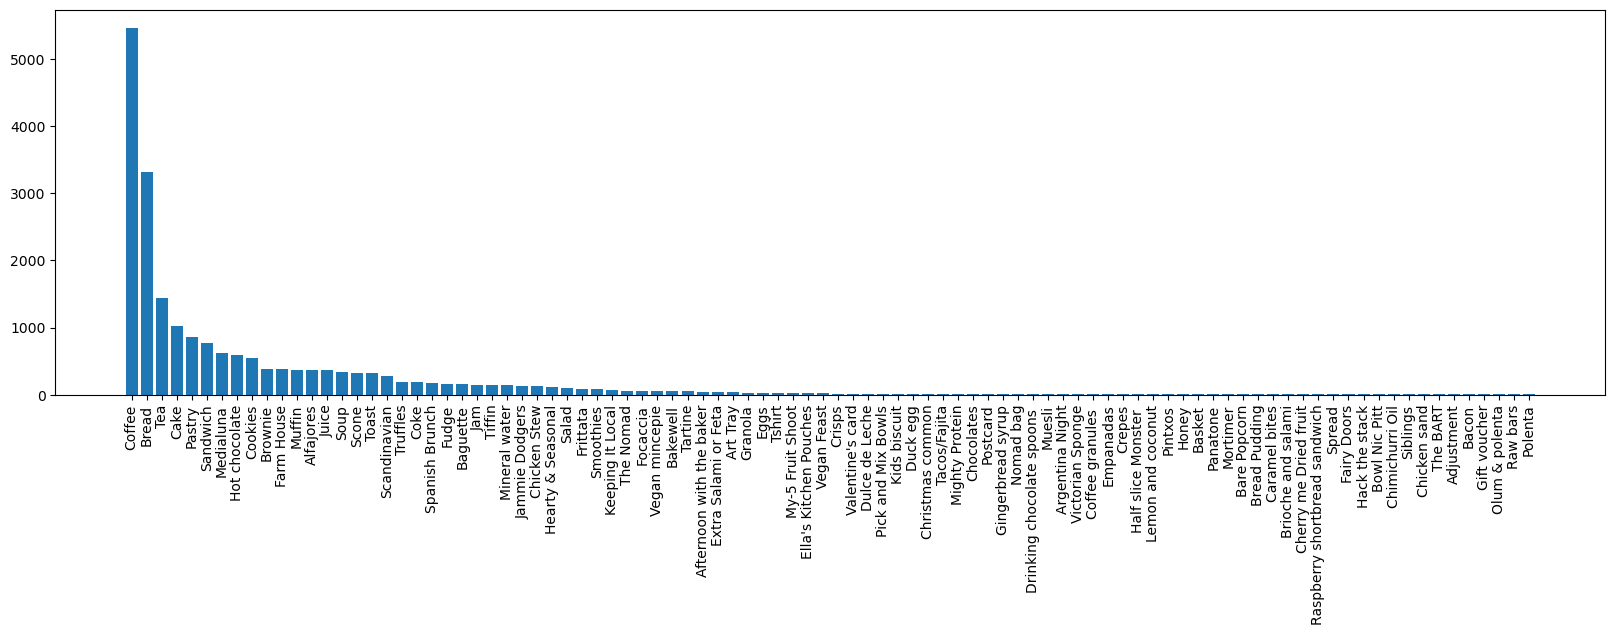

In [42]:
# Graph of Number of Items bought of particular category
plt.rc("figure", figsize=(20, 5))
plt.bar(data["Item"].value_counts().index, data["Item"].value_counts())
plt.xticks(rotation=90);

In [43]:
# We need to install mlxtend on anaconda prompt by typing 'pip install mlxtend'
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [44]:
# Lets visualize which items are more popular

Items = {}

for item in data["Item"]:
    if item in Items:
        Items[item] = Items[item] + 1
    else:
        Items[item] = 1

In [45]:
Items

{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,
 'Olum & pole

In [46]:
keys = []
vals = []

for i, k in Items.items():
    if k> 30:
        keys.append(i)
        vals.append(k)

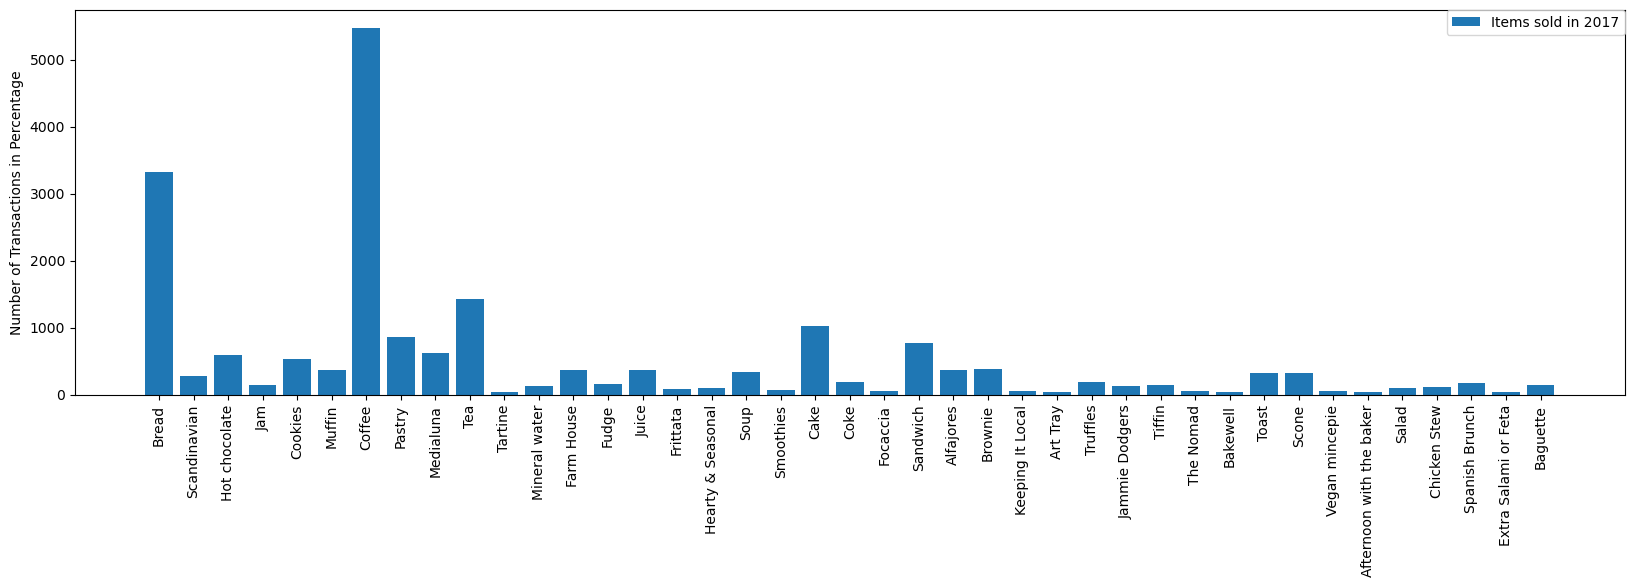

In [49]:
plt.bar(keys, vals, label= "Items sold in 2017")
plt.rcParams["figure.figsize"] = [20, 10]
plt.ylabel("Number of Transactions in Percentage")
plt.xticks(list(keys), rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

This analysis requires that all the data for a transaction be included in 1 row and the items should be 1-hot encoded.

In [50]:
data["Quantity"] = 1

In [51]:
data.head(7)

,Transaction,Item,date_time,period_day,weekday_weekend,Quantity
0,1,Bread,30-10-2016 09:58,morning,weekend,1
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,1
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,1
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,1
4,3,Jam,30-10-2016 10:07,morning,weekend,1
5,3,Cookies,30-10-2016 10:07,morning,weekend,1
6,4,Muffin,30-10-2016 10:08,morning,weekend,1


In [54]:
basket = data.groupby(["Transaction", "Item"])["Quantity"].sum().unstack().fillna(0)

In [56]:
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 
# and anything less the 0 is set to 0. This step will complete the one hot encoding of the data

def encode_uints(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_uints)

In [58]:
# we can change the min_support value from 0 to 1, default value if 0.5 but since our
# support values are less than 0.5 so to include more datasets i am keeping its value 
# 0.03 to include more sets. but the result will depend on teh lift value after applying
# association rules.

frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

In [59]:
frequent_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [60]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [61]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
2,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
3,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
4,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
5,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
6,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
7,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205


As i have mentioned earlier that

A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

so with the value of lift 1.1 we can say that items are not associated with each other.